In [5]:
import pandas as pd
import seaborn as sns
df_pop=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/population_india_census2011.csv')
df_bed=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/HospitalBedsIndia.csv')
df_Age=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/AgeGroupDetails.csv')
df_ICMR=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/ICMRTestingLabs.csv')
df_individ=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/IndividualDetails.csv')
df_State=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/StatewiseTestingDetails.csv')
df_covid=pd.read_csv('/content/drive/My Drive/557629_1487040_bundle_archive/covid_19_india.csv')

In [6]:
df_State.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


STATEWISE ANALYSIS FOR TOTAL SAMPLES

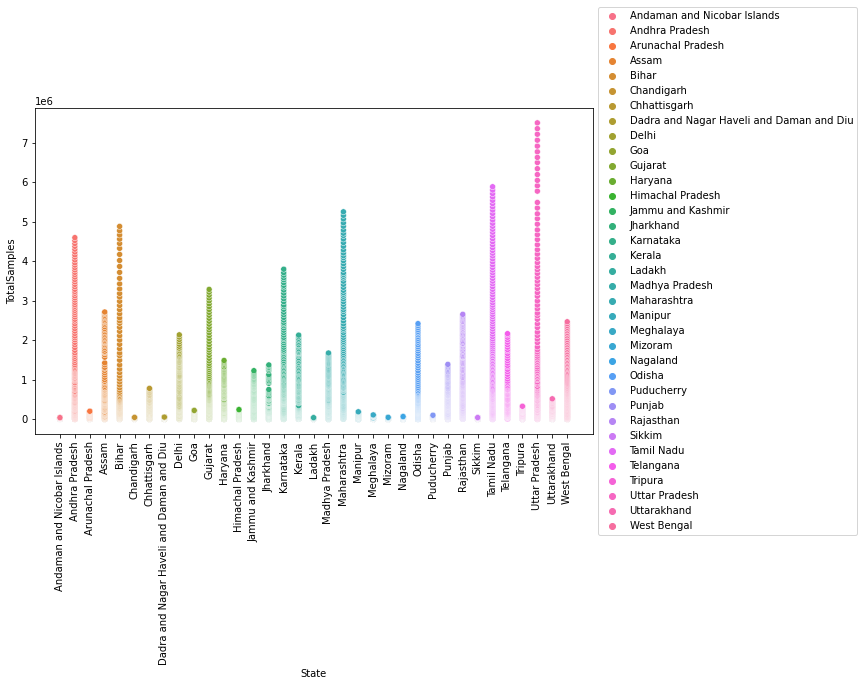

In [7]:
df_state_analysis=df_State
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(10, 6)
g=sns.scatterplot(x="State", y="TotalSamples", hue="State",data=df_state_analysis)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [8]:
from scipy.stats import pearsonr
df=df_State.dropna()
corr, _ = pearsonr(df['TotalSamples'], df['Positive'])
print('Pearsons correlation (Total Samples and Positive): %.3f' % corr)

Pearsons correlation (Total Samples and Positive): 0.786


ANALYSIS OF RISING TREND IN INDIA

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


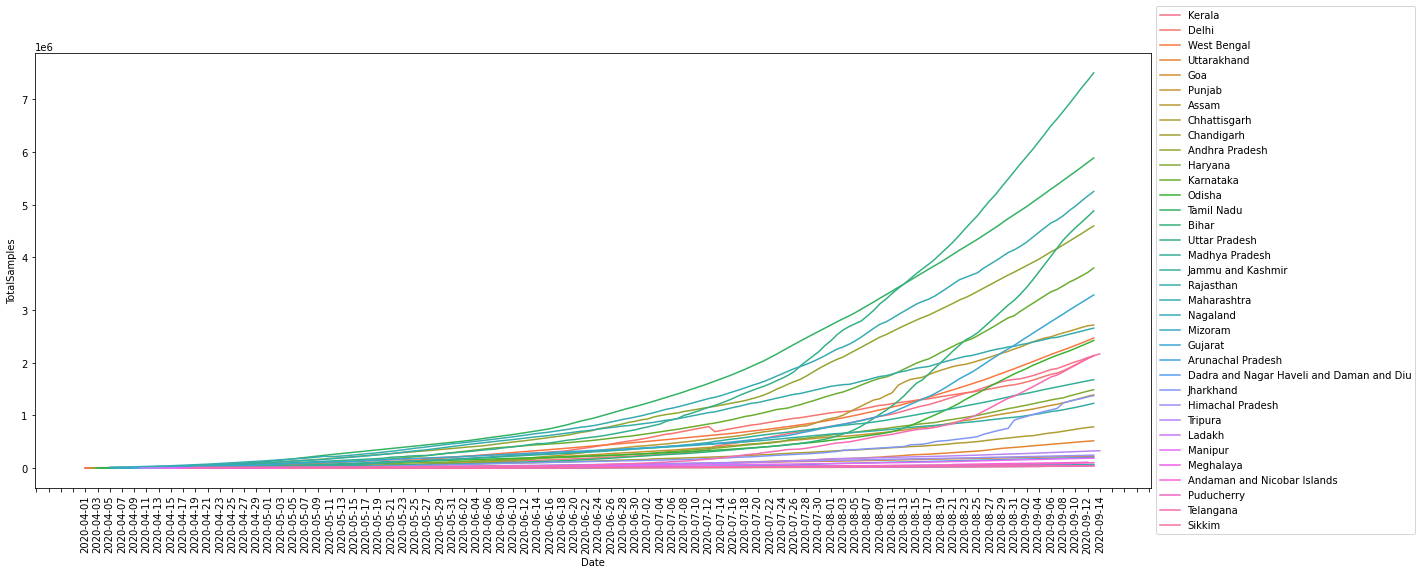

In [9]:
import seaborn as sns
import matplotlib.ticker as ticker
fig = plt.gcf()
fig.set_size_inches(20, 8)
df_filtered=df_state_analysis.sort_values(by=['Date'])
g=sns.lineplot(x="Date", y="TotalSamples",hue="State" ,data=df_filtered)
plt.xticks(rotation=90)
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [10]:
df_State.State.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [11]:
print("Number of states : ",df_State.State.nunique())

Number of states :  35


In [12]:
df_covid.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
6276,6277,14/09/20,8:00 AM,Telengana,-,-,127007,974,158513
6277,6278,14/09/20,8:00 AM,Tripura,-,-,11536,200,19165
6278,6279,14/09/20,8:00 AM,Uttarakhand,-,-,21040,414,31973
6279,6280,14/09/20,8:00 AM,Uttar Pradesh,-,-,239485,4429,312036
6280,6281,14/09/20,8:00 AM,West Bengal,-,-,175139,3945,202708


In [13]:
df_filtered=df_covid.sort_values(by=['State/UnionTerritory'])
cured=df_filtered["Cured"]
deaths=df_filtered["Deaths"]
print("Total Cured : ",cured.sum(skipna=True))
print("Total Deaths : ",deaths.sum(skipna=True))


Total Cured :  131571651
Total Deaths :  3783051


In [14]:
df_filtered=df_covid.sort_values(by=['State/UnionTerritory'])
df_cured=df_filtered[['State/UnionTerritory','Cured']]
df_list=[tuple(x) for x in df_cured.to_numpy()]
from collections import defaultdict 
cured_dict=defaultdict(list)
for k,v in df_list:
  cured_dict[k].append(v)
cured_dict_sum=dict()
for i in cured_dict:
  cured_dict_sum[i]=sum(cured_dict[i])
df_death=df_filtered[['State/UnionTerritory','Deaths']]
df_list_death=[tuple(x) for x in df_death.to_numpy()]
death_dict=defaultdict(list)
for k,v in df_list_death:
  death_dict[k].append(v)
death_dict_sum=dict()
for i in death_dict:
  death_dict_sum[i]=sum(death_dict[i])
print(death_dict_sum)
print("\n")
print(cured_dict_sum)

{'Andaman and Nicobar Islands': 1493, 'Andhra Pradesh': 164360, 'Arunachal Pradesh': 324, 'Assam': 12807, 'Bihar': 30762, 'Cases being reassigned to states': 0, 'Chandigarh': 2490, 'Chhattisgarh': 11065, 'Dadar Nagar Haveli': 0, 'Dadra and Nagar Haveli and Daman and Diu': 124, 'Daman & Diu': 0, 'Delhi': 352388, 'Goa': 7296, 'Gujarat': 259114, 'Haryana': 41874, 'Himachal Pradesh': 2132, 'Jammu and Kashmir': 36726, 'Jharkhand': 15993, 'Karnataka': 248152, 'Kerala': 12054, 'Ladakh': 1059, 'Madhya Pradesh': 100572, 'Maharashtra': 1512539, 'Manipur': 1010, 'Meghalaya': 601, 'Mizoram': 0, 'Nagaland': 401, 'Odisha': 21060, 'Puducherry': 8892, 'Punjab': 62899, 'Rajasthan': 72470, 'Sikkim': 149, 'Tamil Nadu': 375941, 'Telangana': 13342, 'Telangana***': 455, 'Telengana': 38361, 'Telengana***': 480, 'Tripura': 4120, 'Unassigned': 0, 'Uttar Pradesh': 180648, 'Uttarakhand': 11981, 'West Bengal': 176917}


{'Andaman and Nicobar Islands': 85658, 'Andhra Pradesh': 12392403, 'Arunachal Pradesh': 115216

ANALYSIS OF DEATHS IN EACH STATE

<BarContainer object of 42 artists>

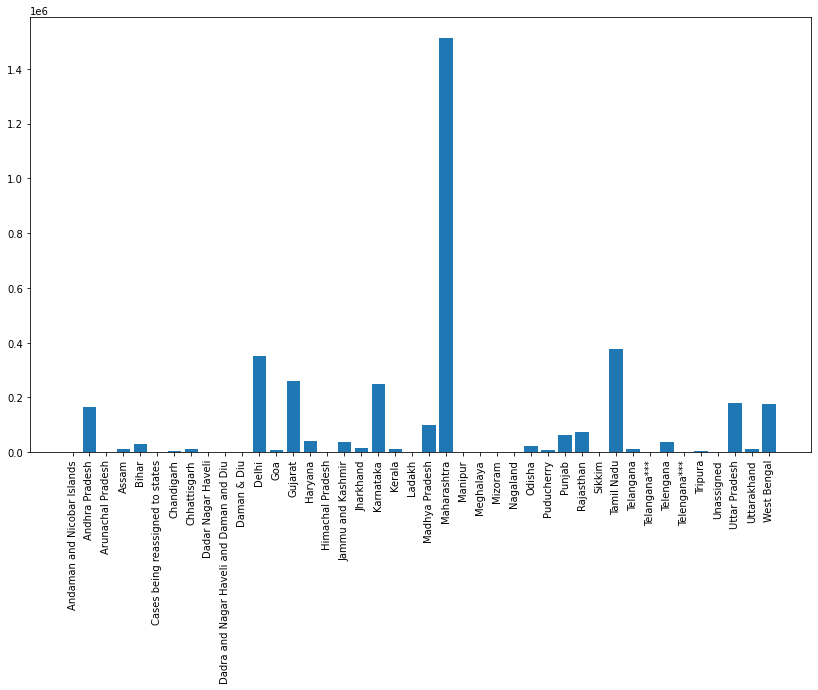

In [15]:
keys = death_dict_sum.keys()
values = death_dict_sum.values()
fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(14, 8)
plt.bar(keys, values)

ANALYSIS OF RECOVERED CASES IN EACH STATE

<BarContainer object of 42 artists>

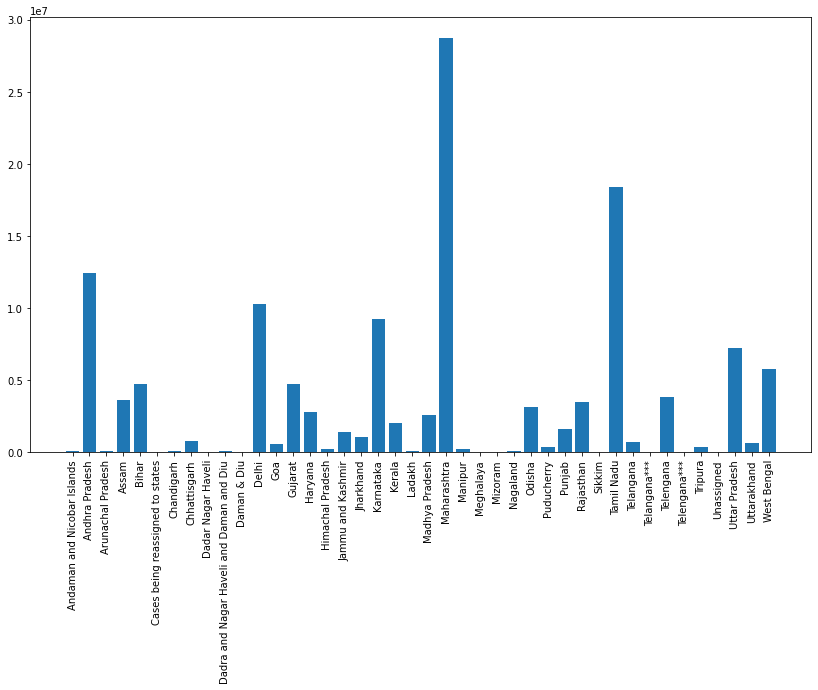

In [16]:
keys = cured_dict_sum.keys()
values = cured_dict_sum.values()
fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(14, 8)
plt.bar(keys, values)

COMPARISON OF CURED AND DEATH CASES IN EACH STATE

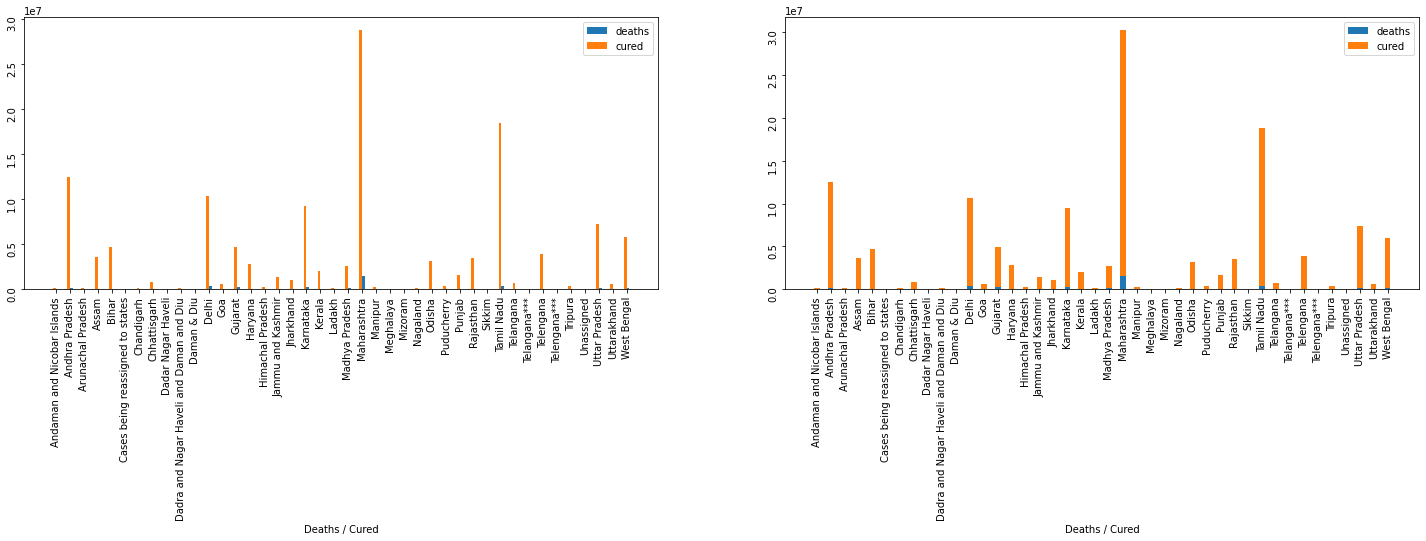

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,5))

ax1.bar(death_dict_sum.keys(), death_dict_sum.values(), width=0.2, align='edge', label='deaths')
ax1.bar(cured_dict_sum.keys(), cured_dict_sum.values(), width=-0.2, align='edge', label='cured')
ax1.set_xlabel('Deaths / Cured')
ax1.legend()

ax2.bar(death_dict_sum.keys(), death_dict_sum.values(), width=0.4, align='center', label='deaths')
ax2.bar(cured_dict_sum.keys(), cured_dict_sum.values(), bottom=[death_dict_sum[i] for i in cured_dict_sum.keys()], width=0.4, align='center', label='cured')
ax2.set_xlabel('Deaths / Cured')
ax2.legend()

for ax in fig.axes:
    ax.tick_params(labelrotation=90)

fig.show()

In [18]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df_covid['Cured'], df_covid['Deaths'])
print('\n Pearsons correlation (Cured and Deaths): %.3f' % corr)

corr, _ = pearsonr(df_covid['Confirmed'], df_covid['Deaths'])
print('\n Pearsons correlation (Confirmed and Deaths): %.3f' % corr)

corr, _ = pearsonr(df_covid['Confirmed'], df_covid['Cured'])
print('\n Pearsons correlation (Confirmed and Cured): %.3f' % corr)


 Pearsons correlation (Cured and Deaths): 0.884

 Pearsons correlation (Confirmed and Deaths): 0.914

 Pearsons correlation (Confirmed and Cured): 0.992


In [19]:
df_ICMR.tail(20)

,lab,address,pincode,city,state,type
247,Ganesh Shanker Vidyarthi Memorial Medical Coll...,Ganesh Shanker Vidyarthi Memorial Medical Coll...,208002,Kanpur,Uttar Pradesh,Government Laboratory
248,"National Institute of Biologicals, Noida","National Institute of Biologicals, Plot No. A-...",201309,Noida,Uttar Pradesh,Government Laboratory
249,"RML Mehrotra Pathology Pvt Ltd., Lucknow","RML Mehrotra Pathology Pvt Ltd., A-21/A, Niral...",226020,Lucknow,Uttar Pradesh,Private Laboratory
250,"Department of Laboratory Medicine, Jaypee Hosp...","Department of Laboratory Medicine, Jaypee Hosp...",201304,Noida,Uttar Pradesh,Private Laboratory
251,"Government Medical College, Haldwani","Government Medical College, Rampur Rd, Rampur,...",263129,Haldwani,Uttarakhand,Government Laboratory
252,All India Institute of Medical Sciences (AIIMS...,All India Institute of Medical Sciences (AIIMS...,249203,Rishikesh,Uttarakhand,Government Laboratory
253,Dr. Ahuja’s Pathlogy and Imaging Centre-Depart...,Dr. Ahuja’s Pathlogy and Imaging Centre-Depart...,248001,Dehradun,Uttarakhand,Private Laboratory
254,ICMR-National Institute of Cholera & Enteric D...,ICMR-National Institute of Cholera & Enteric D...,700010,Kolkata,West Bengal,Government Laboratory
255,Institute of Post Graduate Medical Education a...,Institute of Post Graduate Medical Education a...,700020,Kolkata,West Bengal,Government Laboratory
256,"Midnapore Medical College, Midnapore","Midnapore Medical College, Vidyasagar Road , P...",721101,Midnapore,West Bengal,Government Laboratory


In [20]:
df_city=df_ICMR[['city','type']]
df_list=[tuple(x) for x in df_city.to_numpy()]
from collections import defaultdict 
city_dict=defaultdict(list)
for k,v in df_list:
  city_dict[k].append(v)
city_dict_sum=dict()
for i in city_dict:
    city_dict_sum[i]=len(city_dict[i])    

df_state=df_ICMR[['state','type']]
df_list=[tuple(x) for x in df_state.to_numpy()]
state_dict=defaultdict(list)
for k,v in df_list:
  state_dict[k].append(v)
state_dict_sum=dict()
for i in state_dict:
    state_dict_sum[i]=len(state_dict[i])    
print(state_dict_sum)

print("\n\n States/Union Territories with less then 3 ICMR Labs \n")
for i in state_dict_sum:
    if state_dict_sum.get(i)<3:
        print(i)

{'Andaman and Nicobar Islands': 1, 'Arunachal Pradesh': 1, 'Andhra Pradesh': 7, 'Assam': 6, 'Bihar': 6, 'Chandigarh': 3, 'Chhattisgarh': 3, 'Dadra and Nagar Haveli and Daman and Diu': 1, 'Delhi': 18, 'Gujarat': 14, 'Goa': 1, 'Haryana': 11, 'Himachal Pradesh': 3, 'Jammu and Kashmir': 4, 'Jharkhand': 3, 'Karnataka': 17, 'Kerala': 12, 'Ladakh': 1, 'Maharashtra': 39, 'Madhya Pradesh': 10, 'Manipur': 2, 'Meghalaya': 1, 'Mizoram': 1, 'Odisha': 7, 'Puducherry': 1, 'Punjab': 5, 'Rajasthan': 9, 'Sikkim': 1, 'Tamil Nadu': 26, 'Telangana': 19, 'Tripura': 1, 'Uttar Pradesh': 17, 'Uttarakhand': 3, 'West Bengal': 13}


 States/Union Territories with less then 3 ICMR Labs 

Andaman and Nicobar Islands
Arunachal Pradesh
Dadra and Nagar Haveli and Daman and Diu
Goa
Ladakh
Manipur
Meghalaya
Mizoram
Puducherry
Sikkim
Tripura


FREQUENCY OF ICMR LABS IN EACH STATE

<BarContainer object of 34 artists>

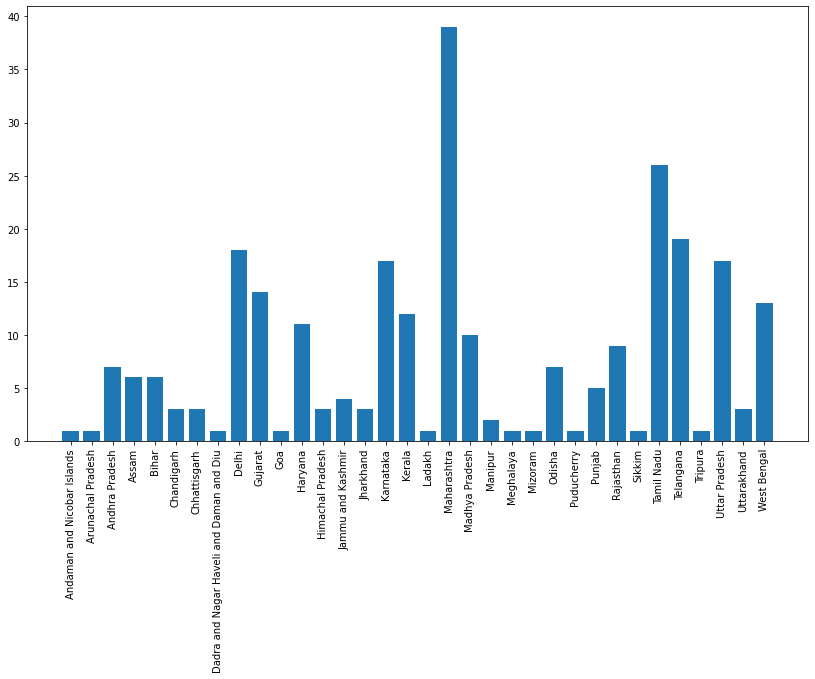

In [21]:
keys = state_dict_sum.keys()
values = state_dict_sum.values()
fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(14, 8)
plt.bar(keys, values)

In [22]:
labs=dict()
for i in df_ICMR['type']:
    if i not in labs:
        labs[i]=1
    else:
        labs[i]=labs[i]+1
print("Total number and type of ICMR Labs in India :\n")
print(labs)

Total number and type of ICMR Labs in India :

{'Government Laboratory': 182, 'Collection Site': 3, 'Private Laboratory': 82}
